In [62]:
  #Mount Google drive 
  from google.colab import drive 
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/Colab Notebooks/dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("unzipping completed")

unzipping completed


In [0]:
!pip install -q keras 

In [0]:
#Get Necessary libraries 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout


#Initializing CNN 
CNN_Classifier =Sequential();

#STEP:1 Covolution 
CNN_Classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3),activation='relu'))
#32 no of fiilter  3,3 is the filter size 
#input_shape=height, width and dimension 3=RGB of each image 

#STEP :2 Pooling 
CNN_Classifier.add(MaxPooling2D(2,2))

# Add one more Convolution +pooling  layer 
#reduce no of filter 
CNN_Classifier.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
CNN_Classifier.add(MaxPooling2D((2, 2), name='maxpool_2'))
CNN_Classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
CNN_Classifier.add(MaxPooling2D((2, 2), name='maxpool_3'))



#STEP 3 :Flattening
CNN_Classifier.add(Flatten())

#ADD DROP OUT LAYER 
CNN_Classifier.add(Dropout(0.5))

#STEP 4 :Full Connection 
#Hiddden layer with 128 neuron 
CNN_Classifier.add(Dense(units=128, activation='relu'))
#output layer with sigmoid 
CNN_Classifier.add(Dense(units=1, activation='sigmoid'))

#STEP 5 : Compiling 
CNN_Classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])







In [66]:
CNN_Classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 31, 31, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 15, 15, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 15, 15, 128)       73856     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)             

In [67]:
#DATA AUGMENTATION TO AVOID OVERFITTING 
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
            rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)
#Meaning of each parameter :
#rescale=1./255:meaning Every pixel will have value between 0 to 255 .Rescale 1./255 is to transform every pixel value from range [0,255] -> [0,1]
#        benefit :both higher and lower pixel image will be treated equally 
#rotation_range=40:image will be rotated 40 degree
#zoom_range=0.2: Image will be zoomed 20 percent 


training_set = train_datagen.flow_from_directory(
        '/content/dataset/training_set',
        target_size=(64, 64),#same as input_shape
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

#Takes the path to a directory & generates batches of augmented data.
# use flow from directory  only when we have  separate training and test folder and 
#inside training and testing folder each folder represents a class 
#meaning of each parameter ::
#directory: string, path to the target directory. """It should contain one subdirectory per class"""
#target_size: Tuple of integers (height, width), defaults to (256, 256). The dimensions to which all images found will be resized.
#color_mode: One of "grayscale", "rgb", "rgba". Default: "rgb".
#class_mode: One of "categorical", "binary", "sparse", "input", or None. Default: "categorical".
  # Determines the type of label arrays that are returned: 
  #- "categorical" will be 2D one-hot encoded labels, 
  #- "binary" will be 1D binary labels, "sparse" will be 1D integer labels, 
  #- "input" will be images identical to input images (mainly used to work with autoencoders). 
  #- If None, no labels are returned 
#batch_size: Size of the batches of data (default: 32).

# history =CNN_Classifier.fit(
#         training_set,
#         steps_per_epoch=200,
#         epochs=20,
#         validation_data=test_set,
#         validation_steps=100, verbose=1)
history =CNN_Classifier.fit_generator(
        training_set,
        steps_per_epoch=2500,#training total image =batch_size * steps_per_epoch
        epochs=20,
        validation_data=test_set,
        validation_steps=620, #testing total image =batch_size * validation_steps
        verbose=1)

#model.fit and model.fit_generator 
#.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
#.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
#parameter of fit_generator :
#training data :training_set (here)
# steps_per_epoch : it specifies the total number of steps taken from the generator as soon as one epoch is finished and next epoch has started. 
#We can calculate the value of steps_per_epoch as the total number of samples in your dataset divided by the batch size.here 8000/32= 250
#-> Epochs : an integer and number of epochs we want to train our model for.
#-> Verbose : specifies verbosity mode(0 = silent, 1= progress bar, 2 = one line per epoch).
#-> validation_data is the test data : test_set here 
#-> validation_steps :only if the validation_data is a generator then only this argumentcan be used. It specifies the total number of steps taken from 
#the generator before it is stopped at every epoch and
# its value is calculated as the total number of training data points in your dataset divided by the batch size. here 2000/32= 60


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/20
2500/2500 [==============================] - 354s 142ms/step - loss: 0.6121 - accuracy: 0.6542 - val_loss: 0.3558 - val_accuracy: 0.7246
Epoch 2/20
2500/2500 [==============================] - 364s 146ms/step - loss: 0.5128 - accuracy: 0.7479 - val_loss: 0.3786 - val_accuracy: 0.7465
Epoch 3/20
2500/2500 [==============================] - 365s 146ms/step - loss: 0.4638 - accuracy: 0.7791 - val_loss: 0.3986 - val_accuracy: 0.8314
Epoch 4/20
2500/2500 [==============================] - 370s 148ms/step - loss: 0.4313 - accuracy: 0.7992 - val_loss: 0.5754 - val_accuracy: 0.8330
Epoch 5/20
2500/2500 [==============================] - 374s 150ms/step - loss: 0.4068 - accuracy: 0.8118 - val_loss: 0.2689 - val_accuracy: 0.8534
Epoch 6/20
2500/2500 [==============================] - 376s 150ms/step - loss: 0.3887 - accuracy: 0.8233 - val_loss: 0.3204 - val_accuracy: 0.8558
Epoch 7/20
2500/2500 [======

In [68]:
#USE SINGLE IMAGE FOR PREDICTION 
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = CNN_Classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  print("prediction is dog ")
else:
  print("prediction is cat ")


prediction is dog 


In [69]:
!pip install h5py

#h5 file stores model and architecture together

#Saving model 
CNN_Classifier.save("/content/drive/My Drive/Colab Notebooks/CNN_classifier_cat_dog.h5")

In [70]:
#predicting output from model 
from tensorflow.python.keras.models import load_model 
# load model
loaded_model = load_model("/content/drive/My Drive/Colab Notebooks/CNN_classifier_cat_dog.h5")
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = loaded_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  print("prediction is dog ")
else:
  print("prediction is cat ")

prediction is dog 


In [0]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history
def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    
    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 5))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

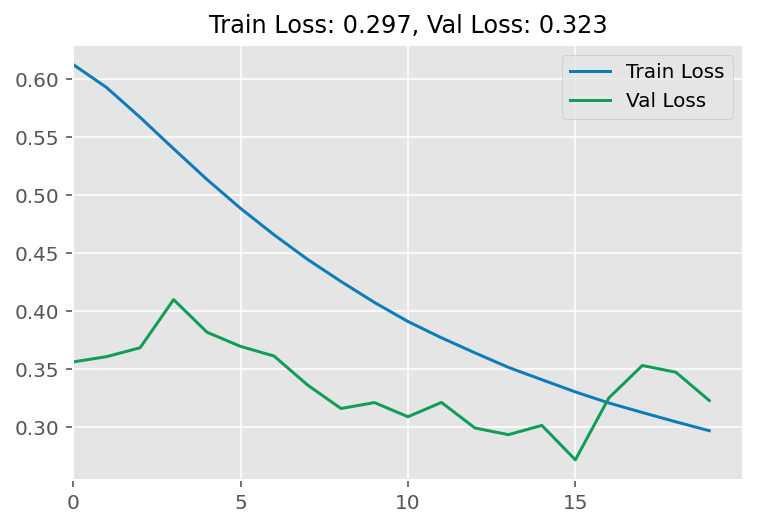

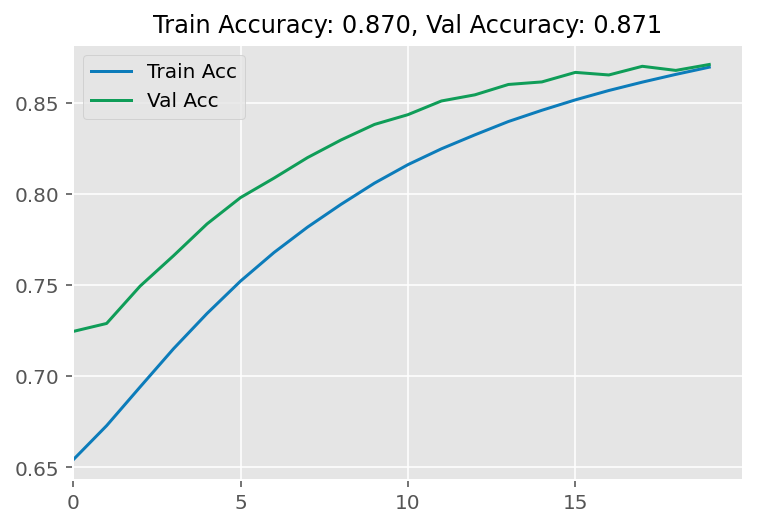

In [72]:
import pickle
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
save_history(history, '/content/drive/My Drive/Colab Notebooks/history.bin')
history = load_history('/content/drive/My Drive/Colab Notebooks/history.bin')
plot_compare(history)